YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


RMSE: 54.182099546402505


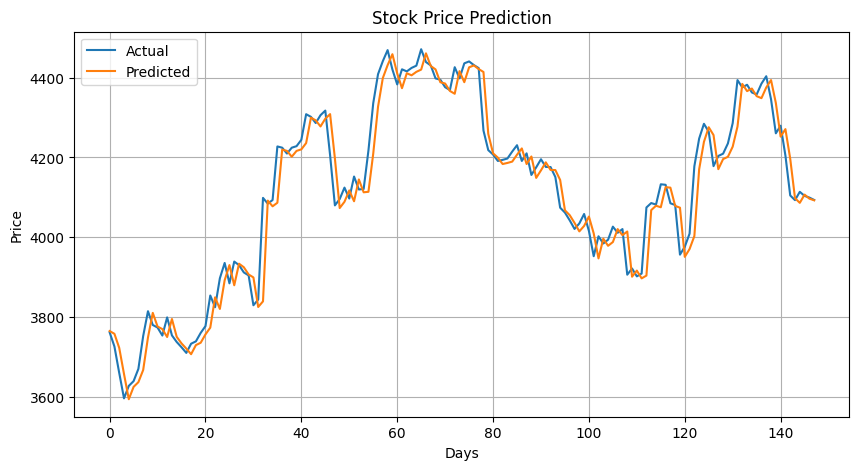

In [2]:
# Step 1: Install and import libraries
!pip install yfinance --quiet

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 2: Download stock data
ticker = "TCS.NS"
data = yf.download(ticker, start="2022-01-01", end="2024-12-31")

# Step 3: Prepare features and target
data["Prev Close"] = data["Close"].shift(1)
data = data.dropna()
X = data[["Prev Close"]]
y = data["Close"]

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

# Step 7: Visualize results
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()